<div style="background-color:#bf283c;">
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    <h1 style="color:White;font-family:'Arial';font-size:30px"><center>Melanoma Detection using CNN</center></h1>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    <p style="text-align:left;font-family:'Courier New';color:FloralWhite;font-size:16px"> | UpGrad - IIITB |
        <span style="float:right;font-family:'Courier New';color:White;font-size:16px"> | Vamsi Krishna P |
        </span>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
</div>



----

### Problem statement

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Dataset

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:
+ Actinic keratosis
+ Basal cell carcinoma
+ Dermatofibroma
+ Melanoma
+ Nevus
+ Pigmented benign keratosis
+ Seborrheic keratosis
+ Squamous cell carcinoma
+ Vascular lesion

### Approach

Build a multiclass classification model using a custom convolutional neural network in TensorFlow. 

----

#### Import libraries:

In [ ]:
import pathlib
import tensorflow as tf
import glob
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#### Mount the google drive:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Assign path to Google Drive dataset for train and test data:

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
basepath ='/content/gdrive/MyDrive/CS_Data/MelanomaDetection'
data_dir_train= pathlib.Path(basepath + '/Train')
data_dir_test=pathlib.Path(basepath + '/Test')

In [ ]:
print (data_dir_train)

/content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))

Count Images available under Train & Test Dataset.

In [ ]:
print(image_count_train)

2239


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


Creation of train & validation dataset from the train directory with a batch size of 32 and resize the images to 180*180 (10%).

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### Writing train dataset here

**Note:**
> 1. Use `seed = 123` during dataset creation using `tf.keras.preprocessing.image_dataset_from_directory`.
> 2. Resize images to the size `img_height*img_width`, while writting to the dataset.

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, subset="training", validation_split=0.2, seed=123, image_size=(img_height, img_width), crop_to_aspect_ratio=False, batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


#### Writing validation dataset here

**Note:**
> 1. Use `seed = 123` during dataset creation using `tf.keras.preprocessing.image_dataset_from_directory`.
> 2. Resize images to the size `img_height*img_width`, while writting to the dataset.

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


List of all the classes of skin cancer and stored them in a list. class names can be found in the `class_names` attribute. These correspond to the directory names in alphabetical order.

In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


----

## Visualizing the data

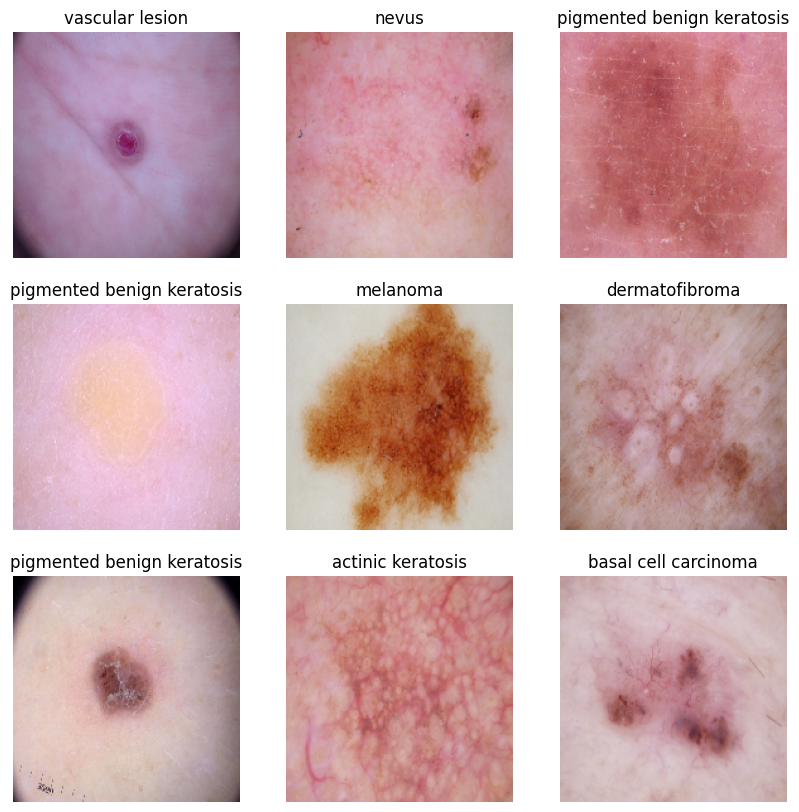

In [ ]:
## Code to visualize one instance of all the nine classes present in the dataset
import matplotlib.pyplot as plt
### using training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

---

## CNN Model creation

+ The model can accurately detect 9 classes present in the dataset using `layers.experimental.preprocessing`.
+ Rescaling to normalize pixel values between (0,1).
+ The RGB channel values are in the [0, 255] range which is not ideal for a neural network. Hence standardizing the values to be in the [0, 1] range.

In [ ]:
### Your code goes here
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

(32, 180, 180, 3)
(32,)


----

## Model Compilation

Choosing an appropirate optimiser and loss function for model training:

## Compiling the model
## Choosing an appropirate optimiser and loss function for model training

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Display the summary of all layers:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## Model Training

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 149s 3s/step - loss: 2.0360 - accuracy: 0.2522 - val_loss: 1.7748 - val_accuracy: 0.4072
Epoch 2/20
56/56 [==============================] - 76s 1s/step - loss: 1.6554 - accuracy: 0.4163 - val_loss: 1.6044 - val_accuracy: 0.4407
Epoch 3/20
56/56 [==============================] - 70s 1s/step - loss: 1.4830 - accuracy: 0.4777 - val_loss: 1.6817 - val_accuracy: 0.4139
Epoch 4/20
56/56 [==============================] - 73s 1s/step - loss: 1.3986 - accuracy: 0.5167 - val_loss: 1.3894 - val_accuracy: 0.5369
Epoch 5/20
56/56 [==============================] - 73s 1s/step - loss: 1.2516 - accuracy: 0.5592 - val_loss: 1.4027 - val_accuracy: 0.5190
Epoch 6/20
56/56 [==============================] - 73s 1s/step - loss: 1.2192 - accuracy: 0.5670 - val_loss: 1.4242 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 71s 1s/step - loss: 1.1947 - accuracy: 0.5731 - val_loss: 1.4309 - val_accuracy: 0.5123
Epoch 8/20
56/56 [=

## Visualize the Training results

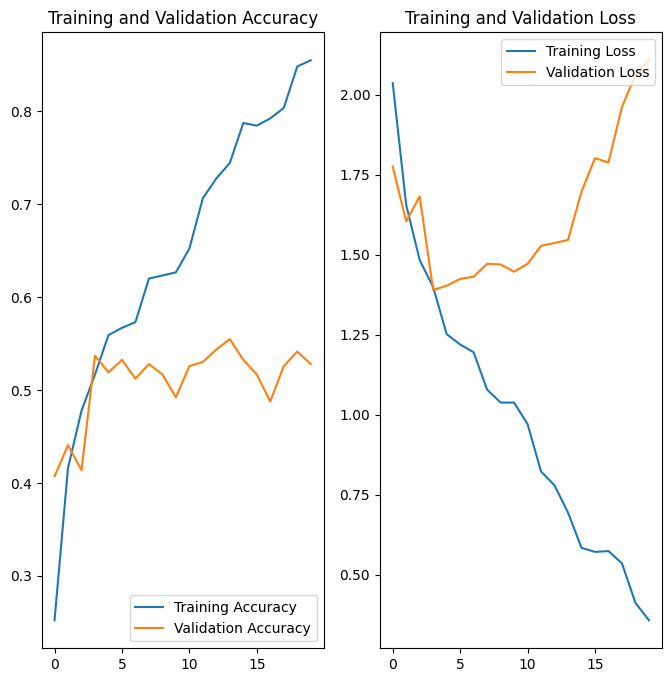

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Findings
>  `Model is clearly a overfit as there is a big difference in accuracy between the training and the validation data.`

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(img_height, 
                                                              img_width,
                                                              3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
])


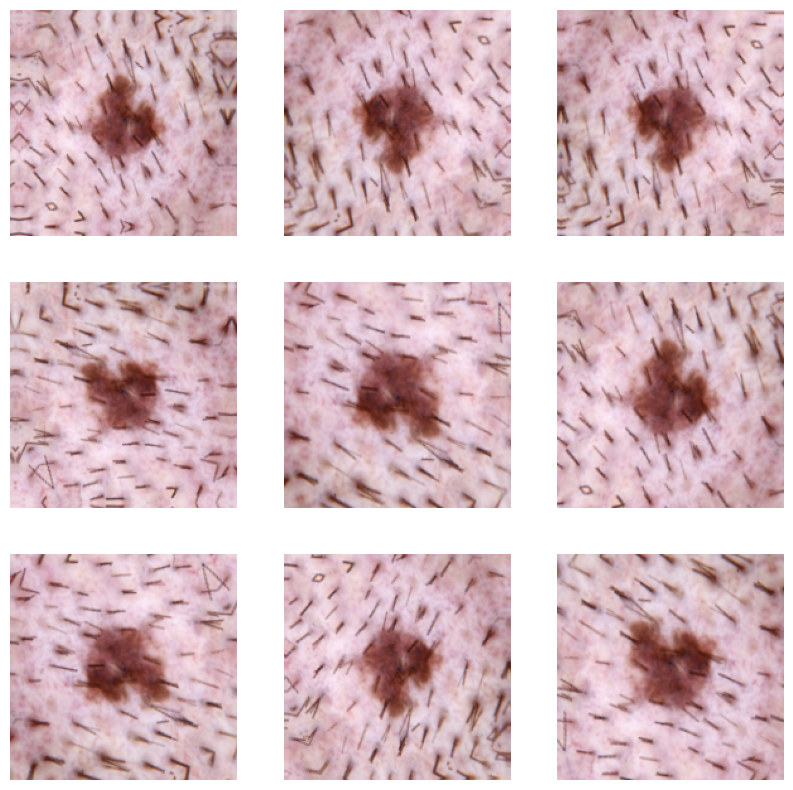

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


-----

## Create the model, compile and train the model

## Model creation, Compilation and Training

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## This is the technique to reduce overfitting is to introduce dropout regularization to the network.
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

## Compile the model

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

In [ ]:
## Note: Training model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 84s 1s/step - loss: 2.2683 - accuracy: 0.1959 - val_loss: 2.0179 - val_accuracy: 0.2774
Epoch 2/20
56/56 [==============================] - 83s 1s/step - loss: 1.9688 - accuracy: 0.2746 - val_loss: 1.8972 - val_accuracy: 0.3535
Epoch 3/20
56/56 [==============================] - 81s 1s/step - loss: 1.7527 - accuracy: 0.3761 - val_loss: 1.5834 - val_accuracy: 0.4452
Epoch 4/20
56/56 [==============================] - 84s 1s/step - loss: 1.5436 - accuracy: 0.4537 - val_loss: 1.5310 - val_accuracy: 0.4877
Epoch 5/20
56/56 [==============================] - 82s 1s/step - loss: 1.4907 - accuracy: 0.4732 - val_loss: 1.5519 - val_accuracy: 0.4765
Epoch 6/20
56/56 [==============================] - 84s 2s/step - loss: 1.4907 - accuracy: 0.4777 - val_loss: 1.4808 - val_accuracy: 0.4899
Epoch 7/20
56/56 [==============================] - 83s 1s/step - loss: 1.3784 - accuracy: 0.5011 - val_loss: 1.4002 - val_accuracy: 0.4989
Epoch 8/20
56/56 [==

## Visualize the results

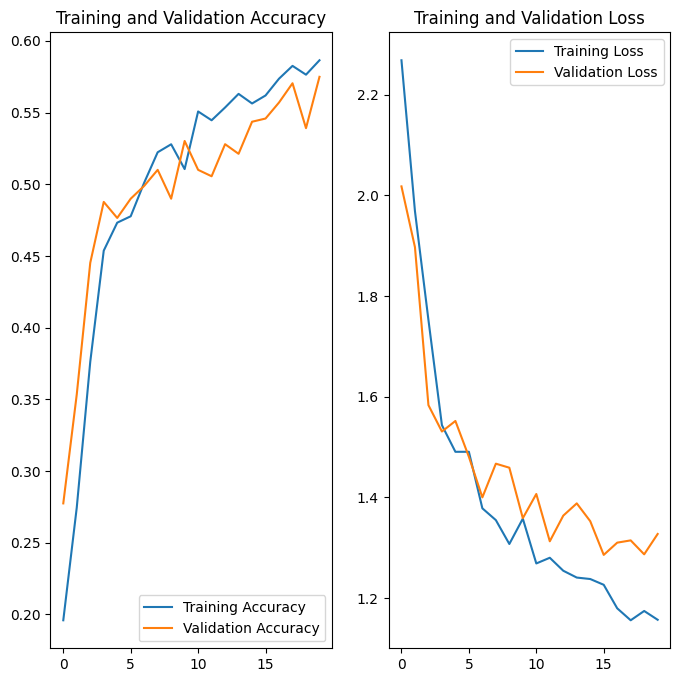

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
#Checking distribution of calsses in the data
folders = ([name for name in os.listdir(data_dir_train)
            if os.path.isdir(os.path.join(data_dir_train, name))]) 
for folder in folders:
    contents = os.listdir(os.path.join(data_dir_train,folder)) 
    print(folder+":"+str(len(contents)))

actinic keratosis:114
melanoma:438
nevus:357
pigmented benign keratosis:462
dermatofibroma:95
basal cell carcinoma:376
squamous cell carcinoma:181
seborrheic keratosis:77
vascular lesion:139


-----

## Findings:
> +  `Seborrheic Keratosis, class has the least number of samples which are `**78**`in number.`
> +  `Pigmented Benign Keratosis, class dominate the data in terms proportionate to number of samples.`


----

## Rectify the imbalance 

Rectifying the imbalance using the python package: <mark>[Augmentor](https://augmentor.readthedocs.io/en/master/)</mark> to add more samples across all classes, so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path_to_training_dataset=data_dir_train
print(path_to_training_dataset)
path_to_training_dataset= pathlib.Path(basepath + '/Train')
csp = str(path_to_training_dataset)
import Augmentor
for i in class_names:
    pipeline = Augmentor.Pipeline(csp + '/'+i)
    pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    pipeline.zoom(probability=0.5, min_factor=1.1, max_factor=1.3)
    pipeline.random_distortion(probability=0.8, grid_width=4, grid_height=4, magnitude=1)
    pipeline.greyscale(1.0)
    pipeline.invert(1.0)
    pipeline.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.


/content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train
Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=L size=600x450 at 0x7F48D9628580>: 100%|██████████| 500/500 [00:42<00:00, 11.69 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=L size=600x450 at 0x7F48D8641190>: 100%|██████████| 500/500 [00:42<00:00, 11.80 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=L size=600x450 at 0x7F48D966EAF0>: 100%|██████████| 500/500 [00:46<00:00, 10.68 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/melanoma/output.

Processing <PIL.Image.Image image mode=L size=767x576 at 0x7F48DAF983A0>: 100%|██████████| 500/500 [03:33<00:00,  2.35 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/nevus/output.

Processing <PIL.Image.Image image mode=L size=919x802 at 0x7F48D8753C70>: 100%|██████████| 500/500 [03:48<00:00,  2.19 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=L size=600x450 at 0x7F48D9545D60>: 100%|██████████| 500/500 [00:44<00:00, 11.33 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=L size=1024x768 at 0x7F48D95B4160>: 100%|██████████| 500/500 [01:44<00:00,  4.80 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=L size=600x450 at 0x7F48D876DBB0>: 100%|██████████| 500/500 [00:41<00:00, 12.13 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=L size=600x450 at 0x7F48D9608B80>: 100%|██████████| 500/500 [00:44<00:00, 11.36 Samples/s]


**`Augmentor` has stored the augmented images to the output sub-directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.**

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
import glob

In [ ]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026984.jpg_29bb3b9a-3982-484b-aa5b-fce6d7226b90.jpg',
 '/content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033705.jpg_d7627cbe-c961-4140-92ac-011ddfd15f06.jpg',
 '/content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033358.jpg_1012d7a9-e062-4c1b-968f-865b9e6391de.jpg',
 '/content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030143.jpg_900c38dd-e08f-4f10-9b21-930e5fae070e.jpg',
 '/content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031922.jpg_5ac872ff-64f8-4c38-8e42-b830f33d7985.jpg',
 '/content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029900.jpg_12d66405-777e-4652-ae3e

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
dataframe_dict = dict(zip(path_list, dataframe_dict_new))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-35-52b21d37c73f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [ ]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesson_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesson_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-36-eb1c51d1c251>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

### Training the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
data_dir_train= os.path.join(data_dir_train)
data_dir_train

'/content/gdrive/MyDrive/CS_Data/MelanomaDetection/Train'

### Creating the validation dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split = 0.2,
  subset = "training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

----

## Create your model (ensure to include normalization)

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

(32, 180, 180, 3)
(32,)


### Compiling model (Choosing optimizer and loss function)

In [ ]:
## Compile model (Choose optimizer and loss function appropriately)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train Model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 283s 2s/step - loss: 2.1465 - accuracy: 0.1719 - val_loss: 2.0206 - val_accuracy: 0.2851
Epoch 2/50
169/169 [==============================] - 238s 1s/step - loss: 1.9569 - accuracy: 0.2739 - val_loss: 1.8991 - val_accuracy: 0.3103
Epoch 3/50
169/169 [==============================] - 253s 1s/step - loss: 1.8660 - accuracy: 0.3177 - val_loss: 1.8192 - val_accuracy: 0.3318
Epoch 4/50
169/169 [==============================] - 251s 1s/step - loss: 1.8023 - accuracy: 0.3348 - val_loss: 1.7613 - val_accuracy: 0.3645
Epoch 5/50
169/169 [==============================] - 251s 1s/step - loss: 1.7527 - accuracy: 0.3605 - val_loss: 1.7892 - val_accuracy: 0.3556
Epoch 6/50
169/169 [==============================] - 252s 1s/step - loss: 1.7224 - accuracy: 0.3694 - val_loss: 1.6672 - val_accuracy: 0.4031
Epoch 7/50
169/169 [==============================] - 248s 1s/step - loss: 1.6973 - accuracy: 0.3819 - val_loss: 1.7334 - val_accuracy: 0.3801

### Visualizing the final model results

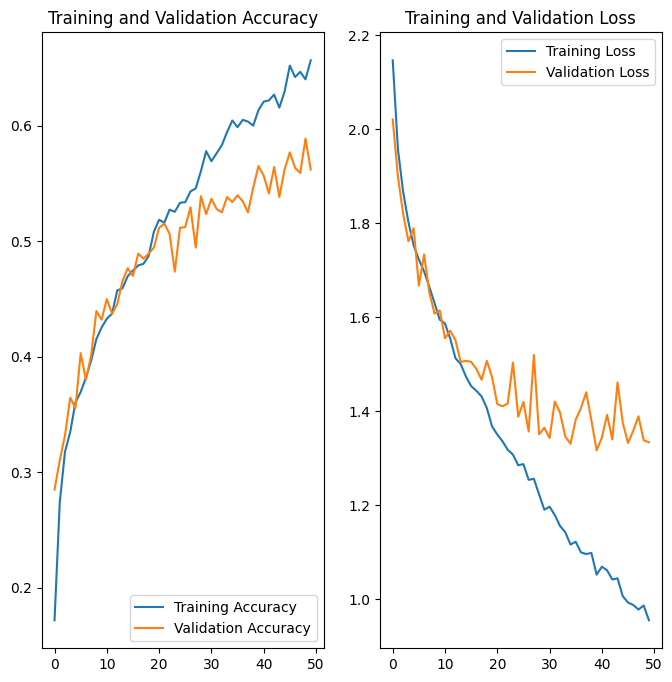

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

----

## Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

> `Yes, the overfitting problem is removed with the help of class rebalance.`

----

## `Credentials:`

Please find the contributor details below:
> + Name: Vamsi Krishna P 
> + Email ID: vamshi.krishna.prime@gmail.com 
> + Phone no: (+91) 9491392912 
> + Batch: ML C45

---

<div style="background-color:#bf283c;">
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    <h2 style="color:White;font-family:'Arial';font-size:30px"><center>End of Notebook</center></h2>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
</div>